## Dijkstra's Algorithm

Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a weighted graph, which may represent, for example, a road network.

It differs from the minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.

The algorithm uses a greedy approach in the sense that we find the next best solution hoping that the end result is the best solution for the whole problem.

In [1]:
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()

    while len(visited) < len(graph):
        current_node = None
        current_distance = float('inf')
        for node in graph:
            if node not in visited and distances[node] < current_distance:
                current_node = node
                current_distance = distances[node]

        if current_node is None:
            break

        print("Visiting", current_node)
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance

    return distances

In [2]:
graph = {'0': {'1': 1, '2': 2},
         '1': {'0': 1, '3': 3, '4': 4},
         '2': {'0': 2},
         '3': {'1': 3},
         '4': {'1': 4, '2': 5}}

result = dijkstra(graph, '0')
print("Shortest distances:", result)

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Shortest distances: {'0': 0, '1': 1, '2': 2, '3': 4, '4': 5}


**Optimized Djikstra's Algorithm**

This version of Djikstra's Algorithm is optimized because:
1. It uses a priority queue (`heapq`) to always process the node with the smallest distance first. This avoids scanning all nodes to find the minimum each time, saving computational effort.

2. The priority queue implementation has better overall efficiency with a time complexity of `(O((V + E) log V))`, where `(E)` is the number of edges, as heap operations (insertion and extraction) are logarithmic.

3. Using the priority queue, this implementation dynamically identifies the next node to process without exhaustively scanning the graph, whereas the less optimized version repeatedly checks all nodes, leading to unnecessary overhead.


In [3]:
import heapq

In [4]:
def dijkstra_optimized(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        print("Visiting", current_node)
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

In [5]:
graph = {'0': {'1': 1, '2': 2},
         '1': {'0': 1, '3': 3, '4': 4},
         '2': {'0': 2},
         '3': {'1': 3},
         '4': {'1': 4, '2': 5}}

result = dijkstra_optimized(graph, '0')
print("Shortest distances:", result)

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Shortest distances: {'0': 0, '1': 1, '2': 2, '3': 4, '4': 5}


Time Complexity: `O(E Log V)`, where `E` is the number of edges and `V` is the number of vertices.

Space Complexity: `O(V)`

**Visualization:**

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import heapq
import numpy as np

In [7]:
graph = {
    '0': {'1': 4, '2': 2, '5': 3},
    '1': {'0': 4, '3': 5, '4': 1, '6': 2},
    '2': {'0': 2, '4': 3, '7': 6},
    '3': {'1': 5, '8': 2},
    '4': {'1': 1, '2': 3, '3': 8, '9': 7},
    '5': {'0': 3, '6': 2, '10': 4},
    '6': {'1': 2, '5': 2, '7': 1, '11': 5},
    '7': {'2': 6, '6': 1, '8': 3, '12': 4},
    '8': {'3': 2, '7': 3, '13': 6},
    '9': {'4': 7, '14': 4},
    '10': {'5': 4},
    '11': {'6': 5},
    '12': {'7': 4},
    '13': {'8': 6},
    '14': {'9': 4},
}

In [8]:
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

In [9]:
def dijkstra_with_steps(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    visited = set()
    priority_queue = [(0, start)]
    steps = []

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        steps.append({
            'node': current_node,
            'visited': visited.copy(),
            'distances': distances.copy(),
            'current_edge': None,
            'event': 'visit'
        })

        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor in visited:
                continue

            distance = current_distance + weight

            steps.append({
                'node': current_node,
                'next_node': neighbor,
                'weight': weight,
                'old_distance': distances[neighbor],
                'new_distance': distance,
                'visited': visited.copy(),
                'distances': distances.copy(),
                'current_edge': (current_node, neighbor),
                'event': 'examine'
            })

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

                steps.append({
                    'node': current_node,
                    'next_node': neighbor,
                    'visited': visited.copy(),
                    'distances': distances.copy(),
                    'current_edge': (current_node, neighbor),
                    'event': 'update'
                })

    return steps

In [10]:
traversal_steps = dijkstra_with_steps(graph, '0')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

node_colors = {
    'unvisited': 'lightblue',
    'visiting': 'orange',
    'visited': 'lightgreen'
}

edge_colors = {
    'unvisited': 'gray',
    'examining': 'red',
    'traversed': 'green',
    'updated': 'purple'
}

<Figure size 1200x800 with 0 Axes>

In [11]:
def update(frame):
    plt.clf()
    step = traversal_steps[frame]
    current_node = step['node']
    visited_nodes = step['visited']
    current_edge = step.get('current_edge')
    event = step['event']
    distances = step['distances']

    node_color_map = []
    for node in G.nodes():
        if node == current_node:
            node_color_map.append(node_colors['visiting'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])

    edge_color_map = []
    for u, v in G.edges():
        if current_edge and ((u, v) == current_edge or (v, u) == current_edge):
            if event == 'update':
                edge_color_map.append(edge_colors['updated'])
            else:
                edge_color_map.append(edge_colors['examining'])
        elif (u in visited_nodes and v in visited_nodes):
            edge_color_map.append(edge_colors['traversed'])
        else:
            edge_color_map.append(edge_colors['unvisited'])

    nx.draw(G, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=2, node_size=700, font_size=18,
            font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    distance_labels = {}
    for node, dist in distances.items():
        if dist == float('infinity'):
            distance_labels[node] = "∞"
        else:
            distance_labels[node] = str(dist)

    dist_pos = {node: (pos[node][0], pos[node][1] - 0.1) for node in pos}
    nx.draw_networkx_labels(G, dist_pos, labels=distance_labels, font_color='red',
                           font_size=14, font_weight='bold')

    plt.title(f"Dijkstra's Algorithm - Step {frame+1}/{len(traversal_steps)}", fontsize=16)

    if event == 'visit':
        description = f"Visiting node: {current_node} (distance: {distances[current_node]})"
    elif event == 'examine':
        old_dist = "∞" if step['old_distance'] == float('infinity') else step['old_distance']
        new_dist = step['new_distance']
        description = f"Examining edge {current_node} → {step['next_node']} (weight: {step['weight']}). Distance: {old_dist} vs {new_dist}"
    else:
        description = f"Updating distance to {step['next_node']}: new distance = {distances[step['next_node']]}"

    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visiting'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='Visited Node'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['examining'], lw=2, label='Examining Edge'),
        plt.Line2D([0], [0], color=edge_colors['updated'], lw=2, label='Updated Edge'),
        plt.Line2D([0], [0], color=edge_colors['traversed'], lw=2, label='Traversed Edge')
    ]

    plt.legend(handles=legend_elements, loc='upper right')

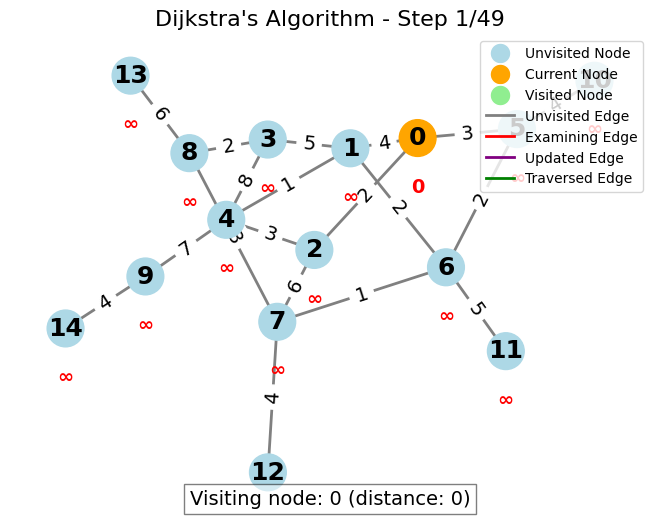

In [12]:
ani = FuncAnimation(plt.gcf(), update, frames=len(traversal_steps), interval=1500, repeat=True)

ani.save('dijkstra_visualization.mp4', writer='ffmpeg', fps=0.7)

## Floyd-Warshall Algorithm

Floyd-Warshall Algorithm is an algorithm for finding the shortest path between all the pairs of vertices in a weighted graph. This algorithm works for both the directed and undirected weighted graphs. But, it does not work for the graphs with negative cycles (where the sum of the edges in a cycle is negative).



In [13]:
def floyd_warshall(graph):
    nodes = list(graph.keys())
    num_nodes = len(nodes)

    INF = float('inf')
    dist = [[INF for _ in range(num_nodes)] for _ in range(num_nodes)]

    for u_index, u in enumerate(nodes):
        for v_index, v in enumerate(nodes):
            if v in graph[u]:
                dist[u_index][v_index] = graph[u][v]
            if u == v:
                dist[u_index][v_index] = 0

    for k_index, k in enumerate(nodes):
        for i_index, i in enumerate(nodes):
            for j_index, j in enumerate(nodes):
                dist[i_index][j_index] = min(dist[i_index][j_index], dist[i_index][k_index] + dist[k_index][j_index])

    result = {}
    for i_index, i in enumerate(nodes):
        result[i] = {}
        for j_index, j in enumerate(nodes):
            result[i][j] = dist[i_index][j_index]

    return result

In [14]:
graph = {'0': {'1': 1, '2': 2},
         '1': {'0': 1, '3': 3, '4': 4},
         '2': {'0': 2},
         '3': {'1': 3},
         '4': {'1': 4, '2': 5}}

shortest_distances = floyd_warshall(graph)
print("Shortest distances:")
for start in shortest_distances:
    for end in shortest_distances[start]:
        print(f"{start} -> {end}: {shortest_distances[start][end]}")

Shortest distances:
0 -> 0: 0
0 -> 1: 1
0 -> 2: 2
0 -> 3: 4
0 -> 4: 5
1 -> 0: 1
1 -> 1: 0
1 -> 2: 3
1 -> 3: 3
1 -> 4: 4
2 -> 0: 2
2 -> 1: 3
2 -> 2: 0
2 -> 3: 6
2 -> 4: 7
3 -> 0: 4
3 -> 1: 3
3 -> 2: 6
3 -> 3: 0
3 -> 4: 7
4 -> 0: 5
4 -> 1: 4
4 -> 2: 5
4 -> 3: 7
4 -> 4: 0


**Optimized Floyd-Warshall:**

This version of the Floyd-Warshall Algorithm is more optimized because:

1. It uses nested dictionaries (`dist[u][v]`), which provide direct lookups for distances between nodes. This is more efficient and intuitive when working with sparse graphs or when the graph structure aligns naturally with key-value pairs.  

2. The `dist` dictionary is initialized directly with distances based on the graph, minimizing redundant operations. Each node initializes distances to infinity (`INF`) for others and explicitly sets the self-distance to 0.  


In [15]:
def floyd_warshall_optimized(graph):
  nodes = list(graph.keys())
  num_nodes = len(nodes)

  INF = float('inf')
  dist = {node: {other: INF for other in nodes} for node in nodes}

  for u in graph:
    for v in graph[u]:
      dist[u][v] = graph[u][v]
    dist[u][u] = 0

  for k in nodes:
    for i in nodes:
      for j in nodes:
        dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  return dist

In [16]:
graph = {'0': {'1': 1, '2': 2},
         '1': {'0': 1, '3': 3, '4': 4},
         '2': {'0': 2},
         '3': {'1': 3},
         '4': {'1': 4, '2': 5}}

shortest_distances = floyd_warshall_optimized(graph)
print("Shortest distances:")
for start in shortest_distances:
    for end in shortest_distances[start]:
        print(f"{start} -> {end}: {shortest_distances[start][end]}")

Shortest distances:
0 -> 0: 0
0 -> 1: 1
0 -> 2: 2
0 -> 3: 4
0 -> 4: 5
1 -> 0: 1
1 -> 1: 0
1 -> 2: 3
1 -> 3: 3
1 -> 4: 4
2 -> 0: 2
2 -> 1: 3
2 -> 2: 0
2 -> 3: 6
2 -> 4: 7
3 -> 0: 4
3 -> 1: 3
3 -> 2: 6
3 -> 3: 0
3 -> 4: 7
4 -> 0: 5
4 -> 1: 4
4 -> 2: 5
4 -> 3: 7
4 -> 4: 0


There are three loops. Each loop has constant complexities. So, the time complexity of the Floyd-Warshall algorithm is `O(n^3)`.

The space complexity of the Floyd-Warshall algorithm is `O(n^2)`.

**Visualization:**

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [55]:
graph = {'0': {'1': 1, '2': 2},
         '1': {'0': 1, '3': 3, '4': 4},
         '2': {'0': 2},
         '3': {'1': 3},
         '4': {'1': 4, '2': 5}}


In [56]:
G = nx.Graph()
for node in graph:
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)

In [57]:
def floyd_warshall_with_steps(graph):
    nodes = sorted(list(graph.keys()), key=int)
    num_nodes = len(nodes)

    INF = float('inf')
    dist = {node: {other: INF for other in nodes} for node in nodes}

    for u in graph:
        for v in graph[u]:
            dist[u][v] = graph[u][v]
        dist[u][u] = 0

    initial_dist = {u: {v: dist[u][v] for v in nodes} for u in nodes}
    steps = [{'k': None, 'i': None, 'j': None, 'dist': initial_dist, 'description': 'Initial distances'}]

    for k in nodes:
        steps.append({
            'k': k, 'i': None, 'j': None,
            'dist': {u: {v: dist[u][v] for v in nodes} for u in nodes},
            'description': f"Considering intermediate node {k}"
        })

        for i in nodes:
            for j in nodes:
                if i == j:
                    continue

                old_dist = dist[i][j]
                through_k = dist[i][k] + dist[k][j]

                if old_dist != INF or through_k != INF:
                    if through_k < old_dist:
                        dist[i][j] = through_k
                        steps.append({
                            'k': k, 'i': i, 'j': j,
                            'old_dist': old_dist,
                            'new_dist': through_k,
                            'dist': {u: {v: dist[u][v] for v in nodes} for u in nodes},
                            'description': f"Update: dist[{i}][{j}] = min({old_dist if old_dist != INF else '∞'}, {dist[i][k] if dist[i][k] != INF else '∞'} + {dist[k][j] if dist[k][j] != INF else '∞'}) = {through_k}",
                            'update': True
                        })
                    else:
                        if old_dist != INF and through_k != INF:
                            steps.append({
                                'k': k, 'i': i, 'j': j,
                                'old_dist': old_dist,
                                'new_dist': through_k,
                                'dist': {u: {v: dist[u][v] for v in nodes} for u in nodes},
                                'description': f"No update: dist[{i}][{j}] remains {old_dist} (path through {k} is {through_k})",
                                'update': False
                            })

    return dist, steps


In [58]:
final_distances, steps = floyd_warshall_with_steps(graph)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

node_colors = {
    'normal': 'lightblue',
    'k_node': 'red',
    'i_node': 'orange',
    'j_node': 'green'
}

edge_colors = {
    'default': 'gray',
    'direct': 'blue',
    'through_k': 'red',
    'improved': 'green'
}

cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#ffffff', '#f0f9e8', '#7bccc4', '#0868ac'])

def update(frame):
    plt.clf()
    step = steps[frame]

    plt.subplot(1, 2, 1)

    node_color_map = [node_colors['normal'] for _ in G.nodes()]
    edge_width_map = [1.5 for _ in G.edges()]
    edge_color_map = [edge_colors['default'] for _ in G.edges()]

    nodes_list = list(G.nodes())

    k = step['k']
    i = step['i']
    j = step['j']

    if k is not None:
        try:
            k_idx = nodes_list.index(k)
            node_color_map[k_idx] = node_colors['k_node']
        except ValueError:
            pass

    if i is not None and j is not None:
        try:
            i_idx = nodes_list.index(i)
            j_idx = nodes_list.index(j)
            node_color_map[i_idx] = node_colors['i_node']
            node_color_map[j_idx] = node_colors['j_node']
        except ValueError:
            pass

        edges = list(G.edges())
        if G.has_edge(i, j):
            direct_edge_idx = edges.index((i, j) if (i, j) in edges else (j, i))
            edge_color_map[direct_edge_idx] = edge_colors['direct']
            edge_width_map[direct_edge_idx] = 3

        if k is not None:
            if G.has_edge(i, k) and G.has_edge(k, j):
                ik_edge_idx = edges.index((i, k) if (i, k) in edges else (k, i))
                kj_edge_idx = edges.index((k, j) if (k, j) in edges else (j, k))

                color = edge_colors['improved'] if 'update' in step and step['update'] else edge_colors['through_k']

                edge_color_map[ik_edge_idx] = color
                edge_color_map[kj_edge_idx] = color
                edge_width_map[ik_edge_idx] = 3
                edge_width_map[kj_edge_idx] = 3

    for idx, (u, v) in enumerate(G.edges()):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                             width=edge_width_map[idx],
                             edge_color=[edge_color_map[idx]])

    nx.draw_networkx_nodes(G, pos, node_color=node_color_map, node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    k_str = f" (k={k})" if k is not None else ""
    plt.title(f"Floyd-Warshall Algorithm - Step {frame+1}/{len(steps)}{k_str}", fontsize=14)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['normal'], markersize=10, label='Regular Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['k_node'], markersize=10, label='k Node (Intermediate)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['i_node'], markersize=10, label='i Node (From)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['j_node'], markersize=10, label='j Node (To)'),
        plt.Line2D([0], [0], color=edge_colors['default'], lw=2, label='Regular Edge'),
        plt.Line2D([0], [0], color=edge_colors['direct'], lw=2, label='Direct Path (i→j)'),
        plt.Line2D([0], [0], color=edge_colors['through_k'], lw=2, label='Path Through k (i→k→j)'),
        plt.Line2D([0], [0], color=edge_colors['improved'], lw=2, label='Improved Path')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, -0.05), ncol=3, fontsize=8)

    plt.subplot(1, 2, 2)

    nodes = sorted(graph.keys(), key=int)
    num_nodes = len(nodes)

    dist_matrix = np.zeros((num_nodes, num_nodes))
    for i_idx, i_node in enumerate(nodes):
        for j_idx, j_node in enumerate(nodes):
            value = step['dist'][i_node][j_node]
            dist_matrix[i_idx, j_idx] = value if value != float('inf') else np.nan

    vmax = np.nanmax(dist_matrix) if not np.isnan(np.nanmax(dist_matrix)) else 20
    im = plt.imshow(dist_matrix, cmap=cmap, vmin=0, vmax=vmax)

    plt.colorbar(im, label="Distance")

    plt.xlabel("To Node")
    plt.ylabel("From Node")
    plt.title("Distance Matrix", fontsize=14)

    plt.xticks(range(num_nodes), nodes)
    plt.yticks(range(num_nodes), nodes)

    for i_idx, i_node in enumerate(nodes):
        for j_idx, j_node in enumerate(nodes):
            value = step['dist'][i_node][j_node]
            text = "∞" if value == float('inf') else str(int(value))
            color = "white" if value > 5 and value != float('inf') else "black"
            plt.text(j_idx, i_idx, text, ha="center", va="center", color=color)

    if i is not None and j is not None and k is not None:
        i_idx = nodes.index(i)
        j_idx = nodes.index(j)
        k_idx = nodes.index(k)

        plt.plot(j_idx, i_idx, 'o', markersize=20, mfc='none', mec='red', mew=2)

        plt.plot(k_idx, i_idx, 'o', markersize=15, mfc='none', mec='orange', mew=2)  # i->k
        plt.plot(j_idx, k_idx, 'o', markersize=15, mfc='none', mec='orange', mew=2)  # k->j

    plt.figtext(0.5, 0.01, step['description'], ha="center", fontsize=12,
                bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

ani = FuncAnimation(plt.gcf(), update, frames=len(steps), interval=1500, repeat=True)

ani.save('floyd_warshall_visualization.mp4', writer='ffmpeg', fps=1)

plt.close()

## Analysis

In [24]:
import networkx as nx
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
import heapq
import pandas as pd

In [25]:
def generate_sparse_graph(n):
    return nx.gnm_random_graph(n, n-1, seed=42)

In [26]:
def generate_dense_graph(n):
    return nx.gnm_random_graph(n, n*(n-1)//2, seed=42)

In [27]:
def floyd_warshall(graph):
    nodes = list(graph.keys())
    INF = float('inf')
    dist = {node: {other: INF for other in nodes} for node in nodes}

    for u in graph:
        for v in graph[u]:
            dist[u][v] = graph[u][v]
        dist[u][u] = 0

    for k in nodes:
        for i in nodes:
            for j in nodes:
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

In [28]:
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

In [29]:
def measure_algorithm_performance(graph, algorithm, start_node=None):
    tracemalloc.start()
    start_time = time.perf_counter()

    if algorithm == 'floyd_warshall':
        dist = floyd_warshall(graph)
    elif algorithm == 'dijkstra':
        dist = dijkstra(graph, start_node)

    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return (end_time - start_time), peak / 1024  # Time in seconds, memory in KB


  Graph Type  Size  Floyd-Warshall Time (s)  Floyd-Warshall Memory (KB)  \
0     Sparse    10                 0.003512                    2.835938   
1      Dense    10                 0.003709                    2.835938   
2     Sparse    50                 0.453493                  124.487305   
3      Dense    50                 0.427548                   82.976562   
4     Sparse   100                 2.563670                  382.398438   
5      Dense   100                 1.900565                  377.407227   
6     Sparse   200                16.703180                 1344.787109   
7      Dense   200                18.597410                 1335.097656   

   Dijkstra Time (s)  Dijkstra Memory (KB)  
0           0.001009             11.789062  
1           0.000961             11.515625  
2           0.046541            255.897461  
3           0.038928            253.960938  
4           0.129357           1533.133789  
5           0.123626           1526.156250  
6        

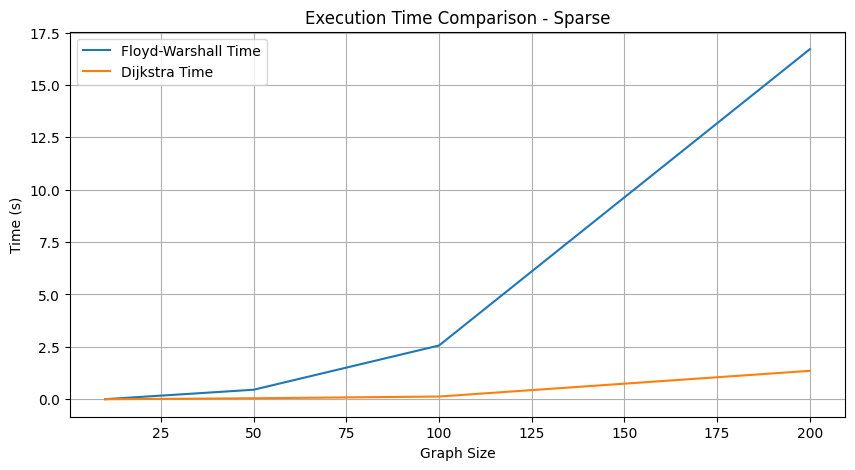

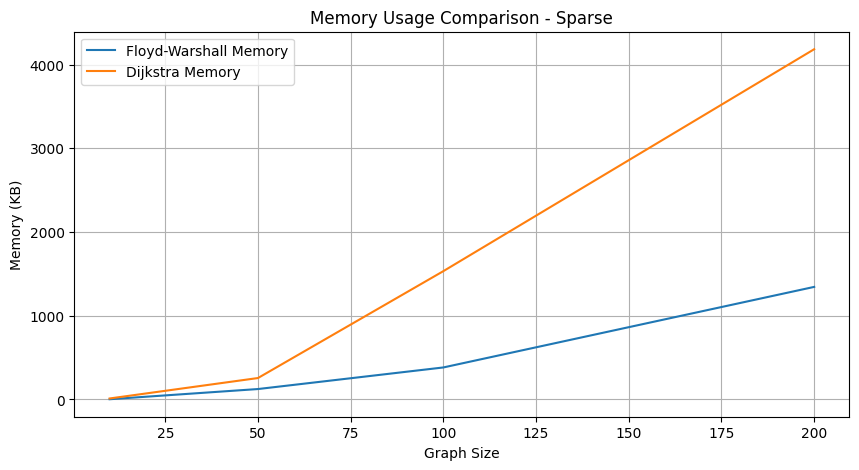

[Time] Dijkstra outperforms Floyd-Warshall in Sparse starting from size 10


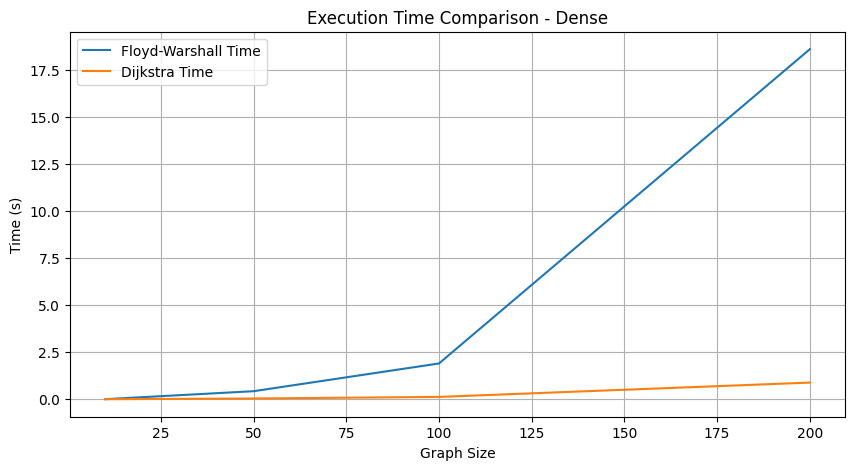

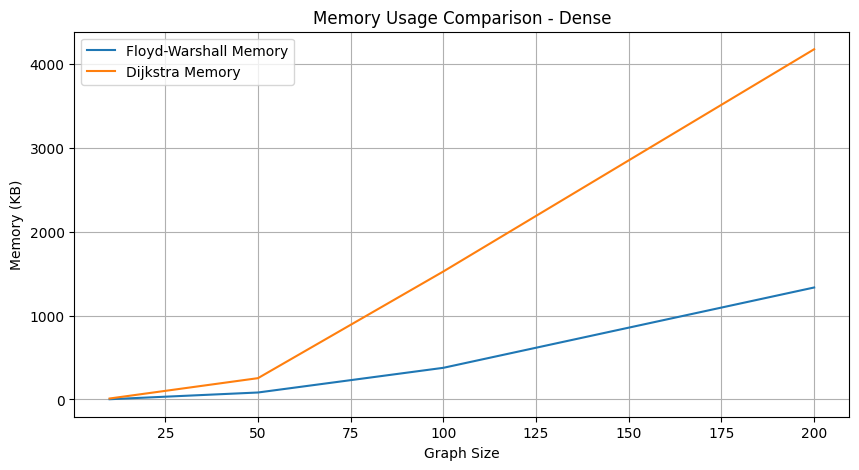

[Time] Dijkstra outperforms Floyd-Warshall in Dense starting from size 10


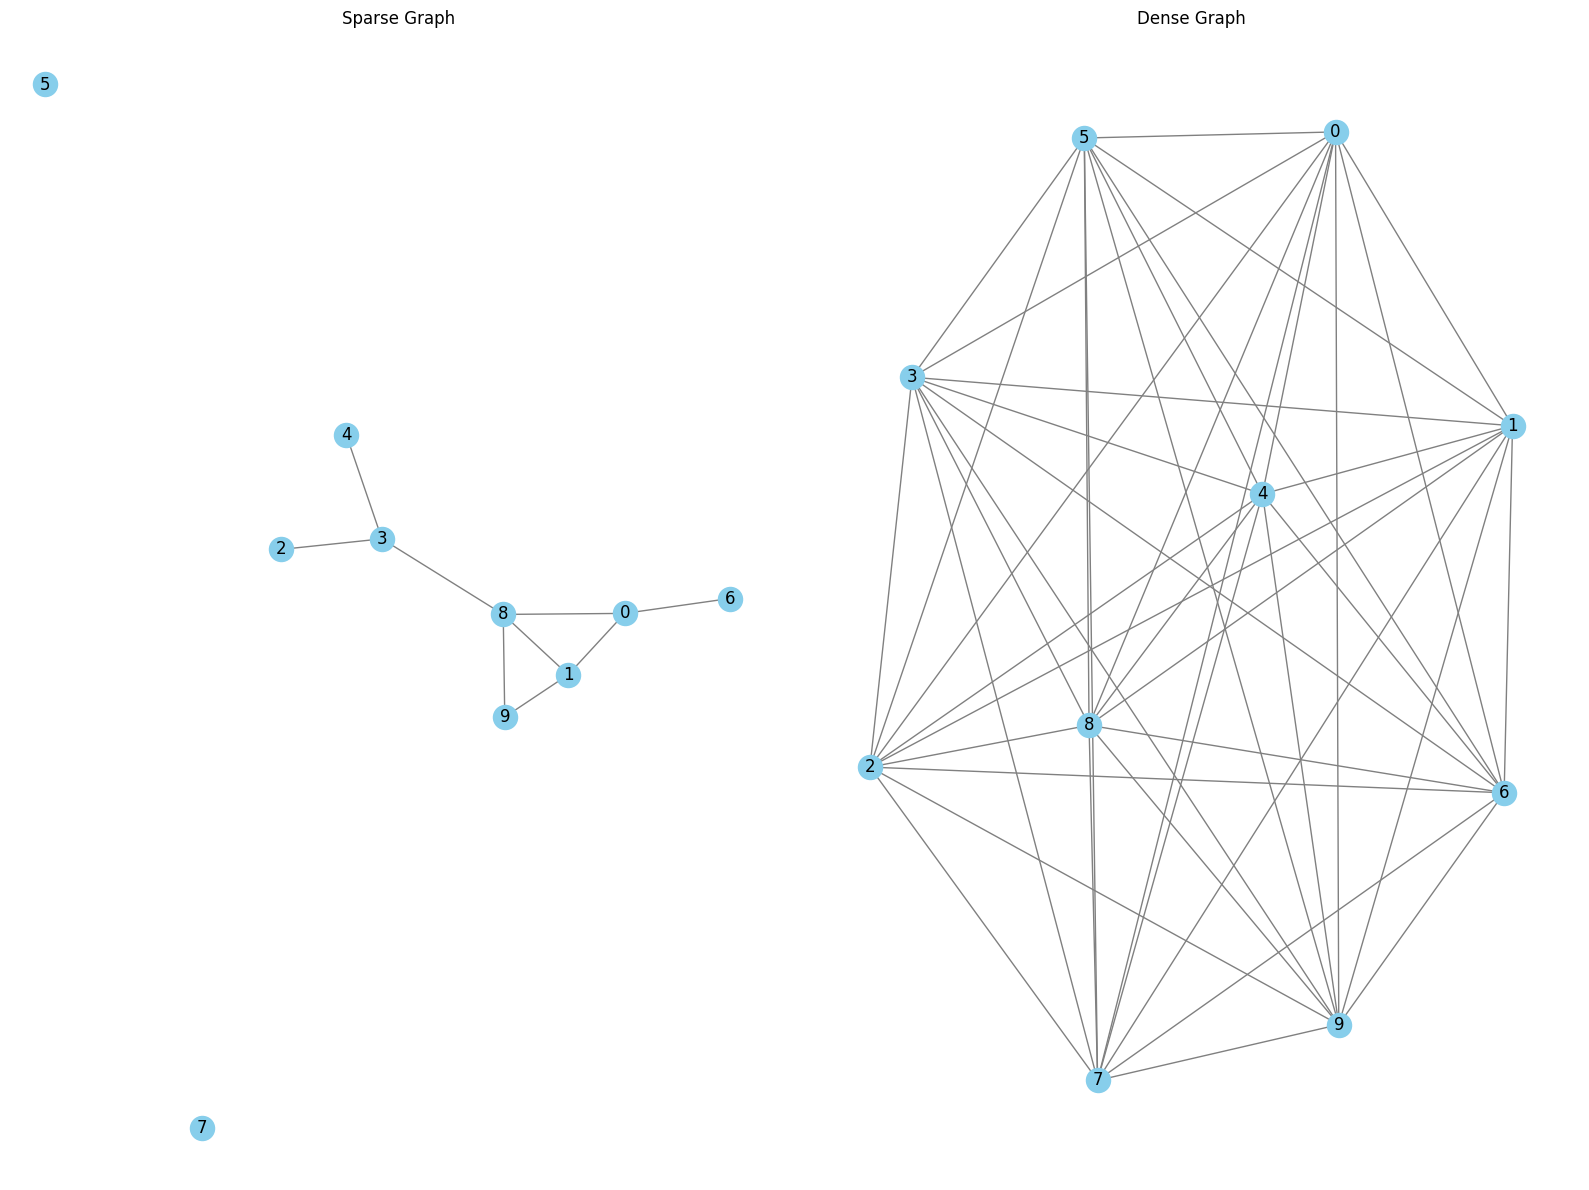

In [30]:
graph_types = {
    'Sparse': generate_sparse_graph,
    'Dense': generate_dense_graph
}

sizes = [10, 50, 100, 200]

results = []

for size in sizes:
    for graph_name, graph_func in graph_types.items():
        G = graph_func(size)
        G = {str(i): {str(j): random.randint(1, 10) for j in range(size) if i != j} for i in range(size)}

        t_fw, m_fw = measure_algorithm_performance(G, 'floyd_warshall')

        total_time_dijkstra = 0
        total_memory_dijkstra = 0
        for node in G:
            t_dijkstra, m_dijkstra = measure_algorithm_performance(G, 'dijkstra', start_node=node)
            total_time_dijkstra += t_dijkstra
            total_memory_dijkstra += m_dijkstra

        results.append({
            'Graph Type': graph_name,
            'Size': size,
            'Floyd-Warshall Time (s)': t_fw,
            'Floyd-Warshall Memory (KB)': m_fw,
            'Dijkstra Time (s)': total_time_dijkstra,
            'Dijkstra Memory (KB)': total_memory_dijkstra
        })

df = pd.DataFrame(results)
print(df)

for graph_type in df['Graph Type'].unique():
    subdf = df[df['Graph Type'] == graph_type]

    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['Floyd-Warshall Time (s)'], label='Floyd-Warshall Time')
    plt.plot(subdf['Size'], subdf['Dijkstra Time (s)'], label='Dijkstra Time')
    plt.title(f'Execution Time Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['Floyd-Warshall Memory (KB)'], label='Floyd-Warshall Memory')
    plt.plot(subdf['Size'], subdf['Dijkstra Memory (KB)'], label='Dijkstra Memory')
    plt.title(f'Memory Usage Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Memory (KB)')
    plt.legend()
    plt.grid(True)
    plt.show()

    better_time = subdf[subdf['Dijkstra Time (s)'] < subdf['Floyd-Warshall Time (s)']]
    better_mem = subdf[subdf['Dijkstra Memory (KB)'] < subdf['Floyd-Warshall Memory (KB)']]

    if not better_time.empty:
        print(f"[Time] Dijkstra outperforms Floyd-Warshall in {graph_type} starting from size {better_time.iloc[0]['Size']}")
    if not better_mem.empty:
        print(f"[Memory] Dijkstra uses less memory than Floyd-Warshall in {graph_type} starting from size {better_mem.iloc[0]['Size']}")

fig, axes = plt.subplots(1, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (graph_name, graph_func) in enumerate(graph_types.items()):
    G = graph_func(10)
    ax = axes[idx]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', ax=ax)
    ax.set_title(f'{graph_name} Graph')

plt.tight_layout()
plt.show()
